In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/rishabhsharma/Documents/GitHub/CS-613-Project/data/df_complete.csv')

In [6]:
df.shape

(185405, 31)

In [5]:
df['sentence_type'].value_counts()

Probation             110355
Confinement            46705
No Further Penalty     17693
Merged                  8196
IPP                     2456
Name: sentence_type, dtype: int64

In [8]:
df.drop(['docket_id', 'defendant_id', 'sequence_number', 'Unnamed: 0'], axis = 1, inplace = True)

In [11]:
df.columns

Index(['gender_x', 'race_x', 'date_of_birth_x', 'arrest_date_x',
       'filing_date_x', 'initiation_date_x', 'status_name_x',
       'court_office__court__display_name_x',
       'current_processing_status__status_change_datetime',
       'judicial_districts', 'court_office_types', 'court_types',
       'representation_type', 'description', 'statute_description',
       'disposing_authority__title', 'sentence_type', 'gender_y', 'race_y',
       'date_of_birth_y', 'arrest_date_y', 'disposition_date', 'filing_date_y',
       'initiation_date_y', 'status_name_y',
       'court_office__court__display_name_y', 'disposing_authority'],
      dtype='object')

In [12]:
df.drop(['gender_y', 'race_y',
       'date_of_birth_y', 'arrest_date_y', 'disposition_date', 'filing_date_y',
       'initiation_date_y', 'status_name_y',
       'court_office__court__display_name_y'], axis = 1, inplace = True)

In [38]:
df.columns

Index(['gender_x', 'race_x', 'date_of_birth_x', 'arrest_date_x',
       'filing_date_x', 'initiation_date_x', 'status_name_x',
       'court_office__court__display_name_x',
       'current_processing_status__status_change_datetime',
       'judicial_districts', 'court_office_types', 'court_types',
       'representation_type', 'description', 'statute_description',
       'disposing_authority__title', 'sentence_type', 'disposing_authority'],
      dtype='object')

In [49]:
df['judicial_districts'].value_counts()

Philadelphia    182521
Name: judicial_districts, dtype: int64

In [35]:
## 'ifjudicial_districts' is not philadelphia, then drop the row
df = df[df['judicial_districts'] == 'Philadelphia']

In [40]:
df.drop(['court_office_types'], axis = 1, inplace = True)

In [44]:
df.drop(['representation_type'], axis = 1, inplace = True)

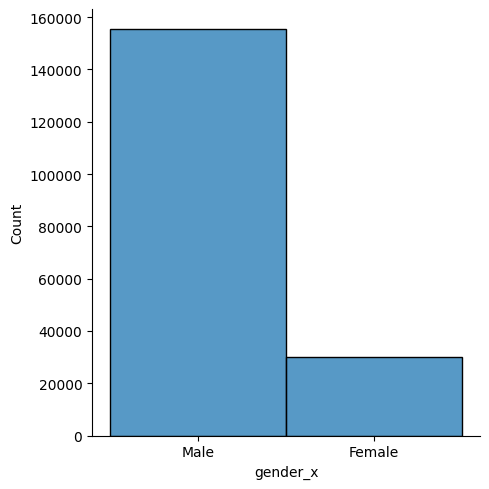

In [20]:
## plotting the genders in the dataset
sns.displot(data=df, x="gender_x")


In [28]:
df['race_x'].value_counts()

Black                             110791
White                              69154
Asian/Pacific Islander              2697
Unknown/Unreported                  2556
Native American/Alaskan Native       112
Asian                                 49
Bi-Racial                             46
Name: race_x, dtype: int64

In [29]:
## lable encoding the categorical variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
df['race_x']= le.fit_transform(df['race_x'])
df['gender_x'] = le.fit_transform(df['gender_x'])
df['status_name_x'] = le.fit_transform(df['status_name_x'])
df['court_office__court__display_name_x'] = le.fit_transform(df['court_office__court__display_name_x'])
df['court_types'] = le.fit_transform(df['court_types'])

In [50]:
df['sentence_type'] = le.fit_transform(df['sentence_type'])
df.drop(['judicial_districts'], axis = 1, inplace = True)

In [53]:
df.head()

,gender_x,race_x,date_of_birth_x,arrest_date_x,filing_date_x,initiation_date_x,status_name_x,court_office__court__display_name_x,current_processing_status__status_change_datetime,court_types,description,statute_description,disposing_authority__title,sentence_type,disposing_authority
1,0,3,1970-01-01,2010-03-01,2010-03-01,2010-03-01,3,0,0001-01-01,3,DUI: Gen Imp/Inc of Driving Safely - 1st Off,DUI: Gen Imp/Inc of Driving Safely - 1st Off,Judge,2,Thomas F. Gehret
3,1,3,1953-01-01,2010-05-01,2010-10-01,2010-10-01,3,1,0001-01-01,4,"Manufacture, Delivery, or Possession With Inte...","Manufacture, Delivery, or Possession With Inte...",Judge,0,Daniel J. Anders
4,1,5,1950-01-01,2010-05-01,2010-06-01,2010-06-01,3,1,0001-01-01,4,Retail Theft-Take Mdse,Retail Theft-Take Mdse,Judge,4,Rayford A. Means
7,1,1,1972-01-01,2011-01-01,2011-01-01,2011-01-01,3,0,0001-01-01,3,DUI: Controlled Substance or Metabolite 1st Of...,DUI: Controlled Substance or Metabolite 1st Of...,Judge,2,Joseph J. O'Neill
8,1,6,1968-01-01,2011-04-01,2011-04-01,2011-04-01,3,1,0001-01-01,4,"Manufacture, Delivery, or Possession With Inte...","Manufacture, Delivery, or Possession With Inte...",Judge,0,Adam nan Beloff


In [69]:
df['statute_description'][8]

'Manufacture, Delivery, or Possession With Intent to Manufacture or Deliver'

In [70]:
df['description'][8]

'Manufacture, Delivery, or Possession With Intent to Manufacture or Deliver'

In [71]:
df.drop(['statute_description'], axis = 1, inplace = True)

In [72]:
df.head()

,gender_x,race_x,date_of_birth_x,arrest_date_x,filing_date_x,initiation_date_x,status_name_x,court_office__court__display_name_x,current_processing_status__status_change_datetime,court_types,description,disposing_authority__title,sentence_type,disposing_authority
1,0,3,1970-01-01,2010-03-01,2010-03-01,2010-03-01,3,0,0001-01-01,3,DUI: Gen Imp/Inc of Driving Safely - 1st Off,Judge,2,Thomas F. Gehret
3,1,3,1953-01-01,2010-05-01,2010-10-01,2010-10-01,3,1,0001-01-01,4,"Manufacture, Delivery, or Possession With Inte...",Judge,0,Daniel J. Anders
4,1,5,1950-01-01,2010-05-01,2010-06-01,2010-06-01,3,1,0001-01-01,4,Retail Theft-Take Mdse,Judge,4,Rayford A. Means
7,1,1,1972-01-01,2011-01-01,2011-01-01,2011-01-01,3,0,0001-01-01,3,DUI: Controlled Substance or Metabolite 1st Of...,Judge,2,Joseph J. O'Neill
8,1,6,1968-01-01,2011-04-01,2011-04-01,2011-04-01,3,1,0001-01-01,4,"Manufacture, Delivery, or Possession With Inte...",Judge,0,Adam nan Beloff
